# **Uncertainty Project -- Deep Learning**

---

_Fabio TOCCO, Antoine GUIDON, Yelman YAHI, Anis OUEDGHIRI, Ram NADER_


# Imports


In [8]:
import os
import tools
from typing import Literal

import torch
import torch.nn as nn
from torch.utils.data import random_split

import torchvision.datasets as datasets

# Setup


In [2]:
DATA_ROOT = os.path.join(os.path.pardir, "data")
MODELS_ROOT = os.path.join(os.path.pardir, "models")

# Create the directories if they do not exist
os.makedirs(DATA_ROOT, exist_ok=True)
os.makedirs(MODELS_ROOT, exist_ok=True)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Selected device: {DEVICE}")

Selected device: cpu


# Hyperparameters (DO NOT CHANGE)


In [3]:
EPOCHS: int = 20
CRITERION: nn.Module = nn.CrossEntropyLoss()
LEARNING_RATE: float = 1e-4
WEIGHT_DECAY: float = 1e-4
BATCH_SIZE: int = 1024

NUM_WORKERS: int = (os.cpu_count() or 0) // 2
print(f"NUM_WORKERS: {NUM_WORKERS}")

NUM_WORKERS: 12


# Parameters (change for different training)


In [4]:
RESIZE_VALUE: int = 32
NORMALIZATION: Literal["MNIST", "ImageNet"] = "MNIST"
SEED: int = 0

tools.seed_everything(seed=SEED)

# Datasets


In [5]:
data_transforms = tools.get_data_transforms(
    data_root=DATA_ROOT, resize_value=RESIZE_VALUE, normalization=NORMALIZATION
)

train_data = datasets.MNIST(
    DATA_ROOT,
    train=True,
    download=True,
    transform=data_transforms,
)
print(f"Number of train samples: {len(train_data)}")

test_data = datasets.MNIST(
    DATA_ROOT,
    train=False,
    download=True,
    transform=data_transforms,
)
print(f"Number of test samples: {len(test_data)}")

num_classes: int = len(train_data.classes)

# Define the validation set by splitting the training data into 2 subsets (80% training and 20% validation)
n_train_samples = int(len(train_data) * 0.8)
n_validation_samples = len(train_data) - n_train_samples
train_data, validation_data = random_split(
    train_data, [n_train_samples, n_validation_samples]
)

Number of train samples: 60000
Number of test samples: 10000


# Experience #1


## DataLoaders


In [6]:
SHUFFLE: bool = False
train_loader, validation_loader, test_loader = tools.get_loaders(
    train_data,
    validation_data,
    test_data,
    shuffle=SHUFFLE,
    batch_size=BATCH_SIZE,
    drop_last=True,
    num_workers=NUM_WORKERS,
)

## Version 1 - Random weights


### Pre-Training


In [7]:
PRETRAINED: bool = False
model = tools.make_resnet18(num_classes, pretrained=PRETRAINED)

OPTIMIZER = torch.optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
)

model_name = tools.get_model_name(
    pretrained=PRETRAINED, shuffle=SHUFFLE, seed=SEED, normalization="MNIST"
)
model_dir = os.path.join(MODELS_ROOT, model_name)
os.makedirs(model_dir, exist_ok=True)

config = {
    "model": "resnet18",
    "pretrained": PRETRAINED,
    "shuffle": SHUFFLE,
    "seed": SEED,
    "normalization": NORMALIZATION,
    "epochs": EPOCHS,
    "batch_size": BATCH_SIZE,
    "learning_rate": LEARNING_RATE,
    "weight_decay": WEIGHT_DECAY,
    "optimizer": "Adam",
    "criterion": "CrossEntropyLoss",
    "num_train_samples": len(train_data),
    "num_val_samples": len(validation_data),
    "num_test_samples": len(test_data),
}

### Training loop


In [ ]:
model, train_losses, validation_losses, validation_accuracies = tools.train_model(
    model=model,
    train_loader=train_loader,
    validation_loader=validation_loader,
    criterion=CRITERION,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    device=DEVICE,
    file_path=os.path.join(model_dir, model_name + ".pt"),
    verbose=True,
    save_plots=True,
    config=config,
)

### Visualize results


In [ ]:
model = tools.load_model(
    model, os.path.join(model_dir, model_name + ".pt"), device=DEVICE
)

test_loss, test_accuracy = tools.evaluate(
    model, test_loader, criterion=CRITERION, device=DEVICE
)
print(
    f"{model_name} -- Loss on test set: {test_loss:.4f} | Accuracy on test set: {100 * test_accuracy:.2f}%",
)

tools.visualize_predictions(
    model=model, dataset=test_data, device=DEVICE, num_samples=20
)

## Version 2 - Pre-trained weights on ImageNet


### Pre-Training


In [ ]:
PRETRAINED: bool = True
model = tools.make_resnet18(num_classes, pretrained=PRETRAINED)

OPTIMIZER = torch.optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
)

model_name = tools.get_model_name(
    pretrained=PRETRAINED, shuffle=SHUFFLE, seed=SEED, normalization="MNIST"
)
model_dir = os.path.join(MODELS_ROOT, model_name)
os.makedirs(model_dir, exist_ok=True)

config = {
    "model": "resnet18",
    "pretrained": PRETRAINED,
    "shuffle": SHUFFLE,
    "seed": SEED,
    "normalization": NORMALIZATION,
    "epochs": EPOCHS,
    "batch_size": BATCH_SIZE,
    "learning_rate": LEARNING_RATE,
    "weight_decay": WEIGHT_DECAY,
    "optimizer": "Adam",
    "criterion": "CrossEntropyLoss",
    "num_train_samples": len(train_data),
    "num_val_samples": len(validation_data),
    "num_test_samples": len(test_data),
}

### Training loop


In [ ]:
model, train_losses, validation_losses, validation_accuracies = tools.train_model(
    model=model,
    train_loader=train_loader,
    validation_loader=validation_loader,
    criterion=CRITERION,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    device=DEVICE,
    file_path=os.path.join(model_dir, model_name + ".pt"),
    verbose=True,
    save_plots=True,
    config=config,
)

### Visualize results


In [ ]:
model = tools.load_model(
    model, os.path.join(model_dir, model_name + ".pt"), device=DEVICE
)

test_loss, test_accuracy = tools.evaluate(
    model, test_loader, criterion=CRITERION, device=DEVICE
)
print(
    f"{model_name} -- Loss on test set: {test_loss:.4f} | Accuracy on test set: {100 * test_accuracy:.2f}%",
)

tools.visualize_predictions(
    model=model, dataset=test_data, device=DEVICE, num_samples=20
)

# Experience #2


## DataLoaders


In [ ]:
SHUFFLE: bool = False
train_loader, validation_loader, test_loader = tools.get_loaders(
    train_data,
    validation_data,
    test_data,
    shuffle=SHUFFLE,
    batch_size=BATCH_SIZE,
    drop_last=True,
    num_workers=NUM_WORKERS,
)

# Expérience 5

In [ ]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms import functional as TF
import random
import tools
import matplotlib.pyplot as plt


# Hypothèses : DATA_ROOT, RESIZE_VALUE, NORMALIZATION, SEED, DEVICE et la liste `models` (7 chemins .pt) existent.
models = [

]

ANGLES = list(range(0, 181, 10))  # 0, 10, ..., 180
N_TEST = 20
SEED_image = 20
assert "models" in globals() and len(models) == 1, "Définis `models` comme une liste de 7 chemins .pt"

test_raw = datasets.MNIST(DATA_ROOT, train=False, download=True, transform=None)

tf = tools.get_data_transforms(
    data_root=DATA_ROOT,
    resize_value=RESIZE_VALUE,
    normalization=NORMALIZATION, 
)

# seed locale pour la sélection (n'affecte pas la seed globale)
rng = random.Random(SEED_image)
sel_idx = sorted(rng.sample(range(len(test_raw)), N_TEST))
print(f"Indices sélectionnés ({N_TEST}) : {sel_idx}")


models_loaded = []
for path in models:
    net = tools.make_resnet18(num_classes=10, pretrained=False)  
    net = tools.load_model(net, file_path=path, device=DEVICE)   
    net.eval()
    models_loaded.append(net)
print(f"{len(models_loaded)} modèles chargés.\n")

@torch.no_grad()
def mean_softmax(x, models_loaded):
    """Retourne la moyenne des softmax sur les 7 modèles pour un batch x."""
    probs_sum = None
    for m in models_loaded:
        logits = m(x.to(DEVICE))
        probs = torch.softmax(logits, dim=1)
        probs_sum = probs if probs_sum is None else probs_sum + probs
    return probs_sum / len(models_loaded)

# --- Suivi détaillé pour 3-4 images ---
track_indices = sel_idx[:4]  # prends les 4 premières (modifie si tu veux d'autres)
per_image_means = {idx: {"label": int(test_raw[idx][1]), "angle_probs": {}} for idx in track_indices}

print("Angle | Accuracy (moyenne softmax sur 7 modèles)")
print("-----------------------------------------------")
for angle in ANGLES:
    correct = 0
    for idx in sel_idx:
        pil_img, y = test_raw[idx]
        pil_rot = TF.rotate(
            pil_img,
            angle,
            interpolation=transforms.InterpolationMode.BILINEAR,
            fill=0
        )
        x = tf(pil_rot).unsqueeze(0)  # (1, C, H, W)
        probs = mean_softmax(x, models_loaded)       # (1, 10)
        pred = probs.argmax(1).item()
        correct += int(pred == int(y))

        # Stockage des probas moyennes pour les images suivies
        if idx in per_image_means:
            per_image_means[idx]["angle_probs"][angle] = probs.squeeze(0).cpu()

    acc = correct / N_TEST
    print(f"{angle:5d}° | {acc:.2f}")


show_angles = [0, 30, 60, 90, 120, 150, 180] 
print("\n\n===== Aperçu des probabilités moyennes (4 images) =====")
for idx in track_indices:
    true_y = per_image_means[idx]["label"]
    print(f"\nImage idx={idx} | True={true_y}")
    print(" angle | pred | p(pred) | p(true)")
    print("-------+------+---------+--------")
    for a in show_angles:
        probs = per_image_means[idx]["angle_probs"].get(a, None)
        if probs is None:
            continue
        pred = int(torch.argmax(probs).item())
        p_pred = float(probs[pred].item())
        p_true = float(probs[true_y].item())
        print(f"{a:6d} | {pred:4d} | {p_pred:7.3f} | {p_true:6.3f}")





Indices sélectionnés (20) : [442, 1228, 1663, 1691, 2049, 2477, 2775, 3273, 3418, 4257, 5192, 5228, 5364, 6664, 6742, 6749, 7362, 7772, 9387, 9513]
1 modèles chargés.

Angle | Accuracy (moyenne softmax sur 7 modèles)
-----------------------------------------------
    0° | 1.00
   10° | 1.00
   20° | 1.00
   30° | 0.80
   40° | 0.65
   50° | 0.35
   60° | 0.30
   70° | 0.20
   80° | 0.05
   90° | 0.10
  100° | 0.05
  110° | 0.15
  120° | 0.20
  130° | 0.20
  140° | 0.25
  150° | 0.25
  160° | 0.25
  170° | 0.30
  180° | 0.30


===== Aperçu des probabilités moyennes (4 images) =====

Image idx=442 | True=3
 angle | pred | p(pred) | p(true)
-------+------+---------+--------
     0 |    3 |   1.000 |  1.000
    30 |    3 |   0.990 |  0.990
    60 |    7 |   0.500 |  0.012
    90 |    0 |   0.687 |  0.001
   120 |    5 |   0.743 |  0.000
   150 |    8 |   0.973 |  0.000
   180 |    8 |   0.639 |  0.000

Image idx=1228 | True=9
 angle | pred | p(pred) | p(true)
-------+------+---------+----

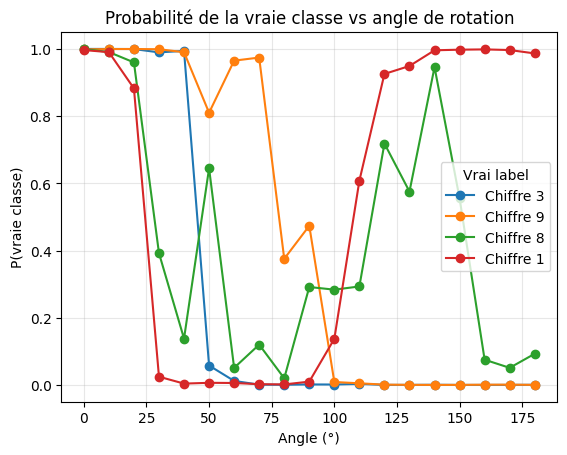

In [15]:

for idx in track_indices:
    label = per_image_means[idx]["label"]
    angles = sorted(per_image_means[idx]["angle_probs"].keys())
    probs_true = [
        per_image_means[idx]["angle_probs"][a][label].item()
        for a in angles
    ]
    plt.plot(angles, probs_true, marker="o", label=f"Chiffre {label}")

plt.title("Probabilité de la vraie classe vs angle de rotation")
plt.xlabel("Angle (°)")
plt.ylabel("P(vraie classe)")
plt.legend(title="Vrai label")
plt.grid(True, alpha=0.3)
plt.show()